In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from sklearn.decomposition import PCA

In [2]:
project_path = "/Users/davidsewell/Github/JaneStreetComp"
data_path = "/Users/davidsewell/MLData/JaneStreet"

In [3]:
os.chdir(project_path)

In [59]:
from src.data import JaneData

In [60]:
jane_street = JaneData(data_path)

Done Loading Jane Data
Using seed data None


In [61]:
train_data = jane_street.train_df

In [62]:
train_data.head()

,Unnamed: 0,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [78]:
winning_train = train_data[train_data["resp"] > 0]

In [76]:
winning_train = winning_train.iloc[:9000,:]

<AxesSubplot:>

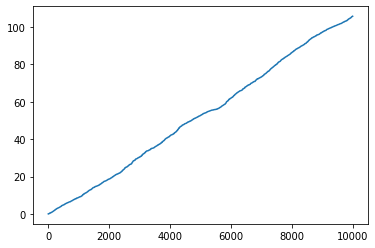

In [79]:
winning_train["resp"].cumsum().plot()

<AxesSubplot:>

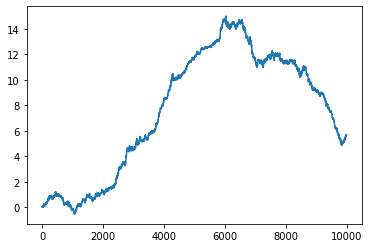

In [75]:
train_data["resp"].cumsum().plot()

In [73]:
np.dot(winning_train["resp"],winning_train["weight"])

0.0

In [8]:
len(train_data)

1000

In [9]:
num_null = len(train_data[train_data["feature_121"].isna()]["feature_121"])

In [10]:
print(num_null / len(train_data))

0.147


In [11]:
def replace_with_mean(x):
    mean = x.mean()
    x[x.isna()] = mean
    return x

In [12]:
feature_col = [f"feature_{i}" for i in range(130)]

In [13]:
features = train_data[feature_col]

In [14]:
features.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,447.000000,447.000000,1000.000000,...,853.000000,853.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.0400,0.496074,-0.640042,0.057226,-0.009306,0.120638,0.043722,0.270739,0.016265,0.921622,...,1.972835,2.078800,1.707581,1.205025,1.824572,2.186088,2.256832,1.489292,1.933609,1.209615
std,0.9997,2.813650,1.887438,1.192238,0.593478,1.393451,0.715012,2.235655,1.516100,2.833809,...,2.346236,2.082270,2.572787,2.134643,2.307709,2.594815,3.026122,2.122479,2.749016,1.948273
min,-1.0000,-3.172026,-3.093182,-3.820178,-1.993175,-5.292675,-2.352979,-6.718897,-4.417746,-7.464709,...,-1.768133,-3.360938,-2.531460,-4.056951,-1.578910,-3.832051,-2.753842,-3.274885,-2.369655,-3.840642
25%,-1.0000,-1.417734,-2.023129,-0.656010,-0.352255,-0.716047,-0.434721,-0.987507,-0.834626,-0.874983,...,0.111553,0.674919,-0.201382,-0.073832,0.058328,0.533277,-0.140426,0.137348,-0.177361,-0.035896
50%,1.0000,0.047609,-0.994096,-0.076187,-0.073584,0.088367,0.028274,0.283656,-0.009975,0.710073,...,1.505598,1.751611,1.155451,0.949498,1.286848,1.736004,1.702586,1.114636,1.368377,0.961016
75%,1.0000,1.945747,0.400438,0.683118,0.316717,0.860443,0.457729,1.585174,1.010140,2.621794,...,3.526987,3.219198,2.990311,2.253399,3.169421,3.319203,4.156204,2.454830,3.497033,2.095593
max,1.0000,16.316907,7.571535,4.283198,2.131880,5.262332,2.374772,8.827620,4.703012,11.938555,...,12.237239,11.840724,15.719563,12.614915,12.639668,23.017784,14.264053,18.969491,15.418266,12.143004


<AxesSubplot:>

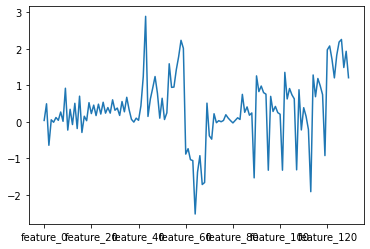

In [15]:
features.describe().loc["mean"].plot()

In [16]:
features = features.apply(lambda x: replace_with_mean(x))

<AxesSubplot:>

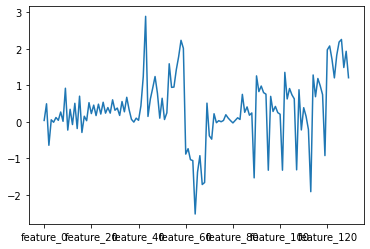

In [17]:
# Shouldnt change after replace
features.describe().loc["mean"].plot()

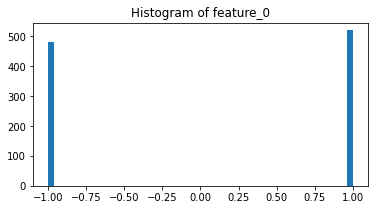

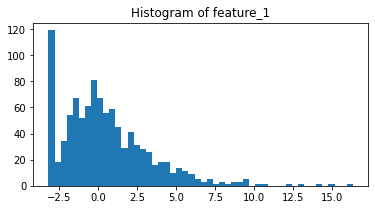

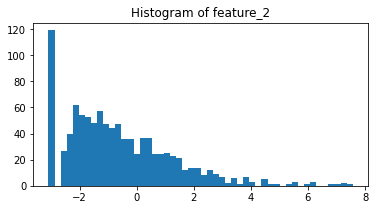

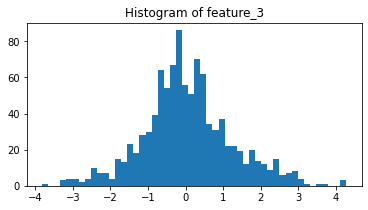

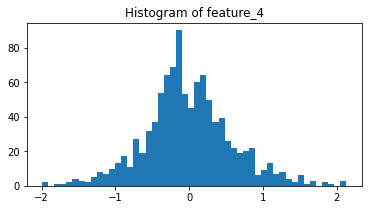

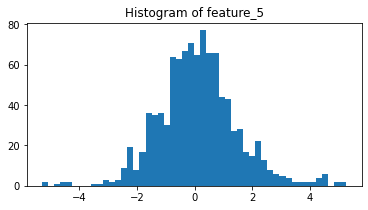

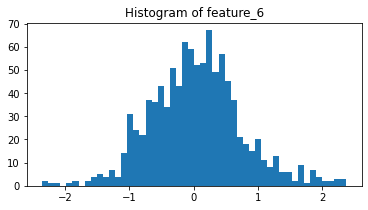

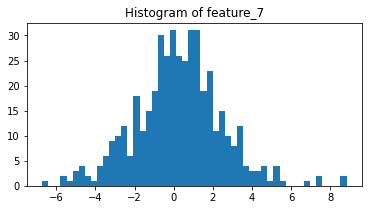

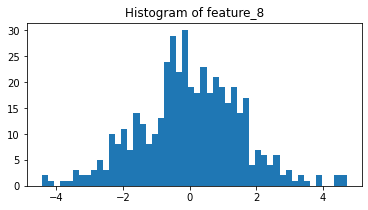

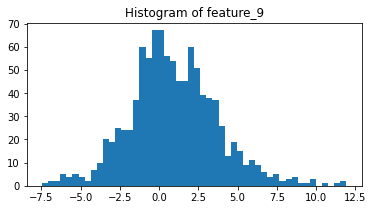

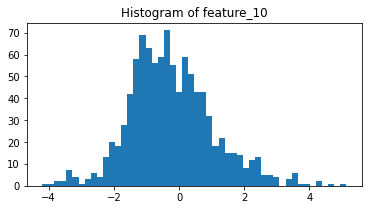

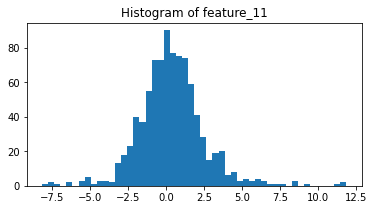

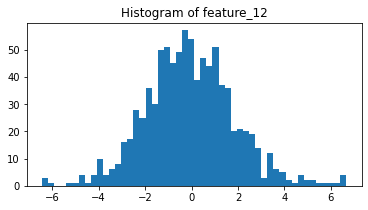

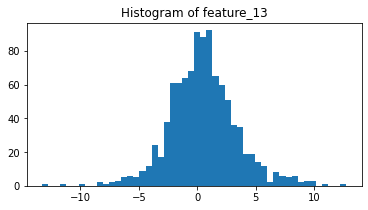

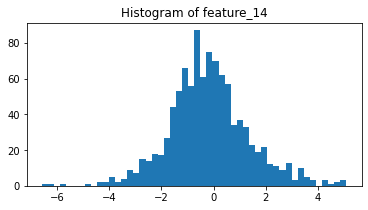

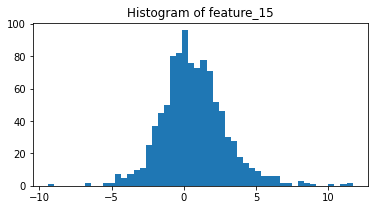

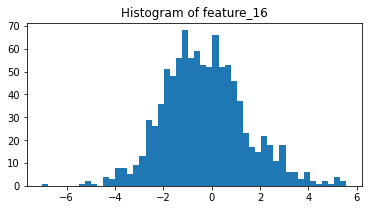

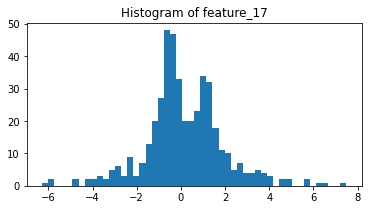

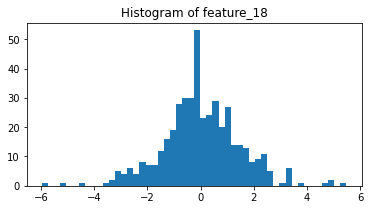

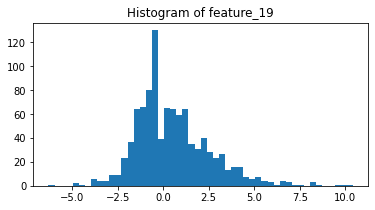

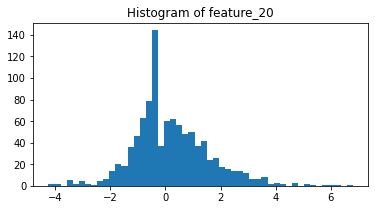

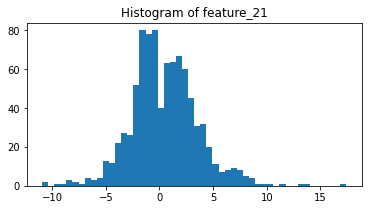

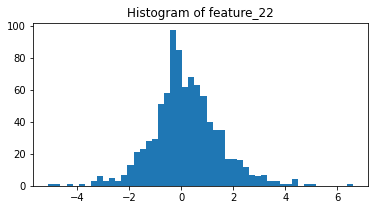

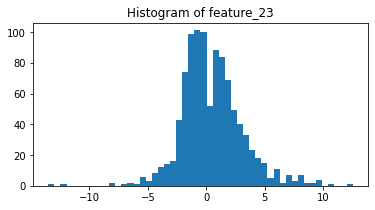

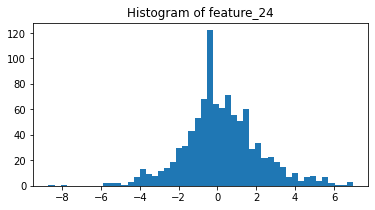

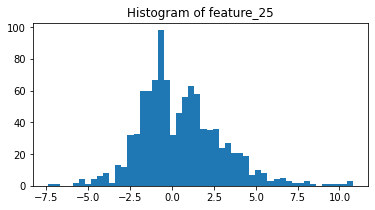

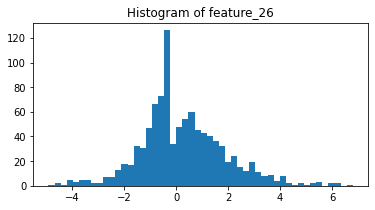

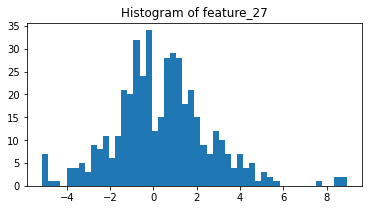

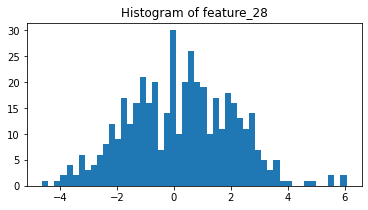

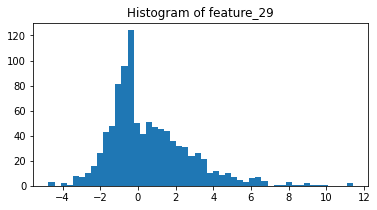

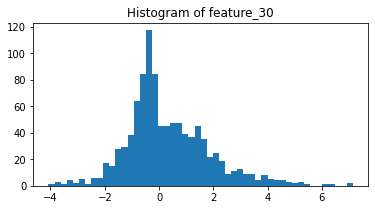

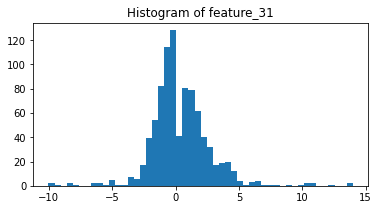

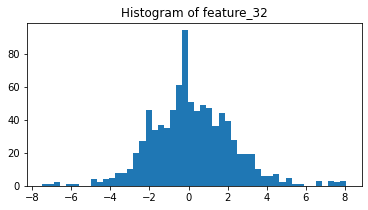

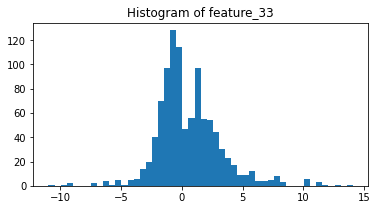

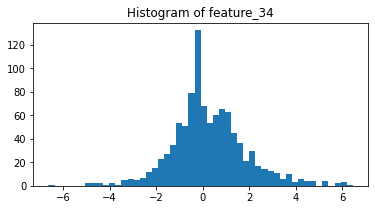

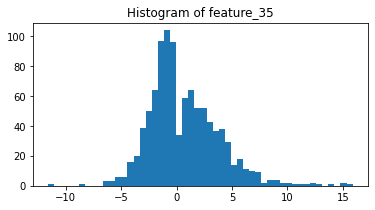

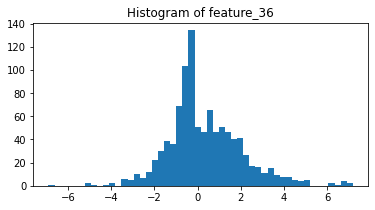

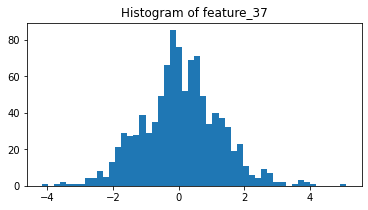

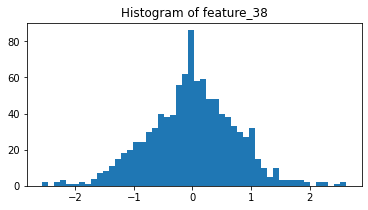

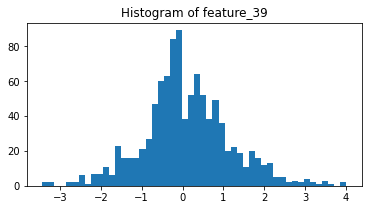

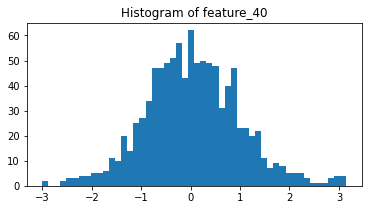

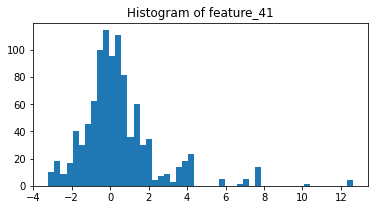

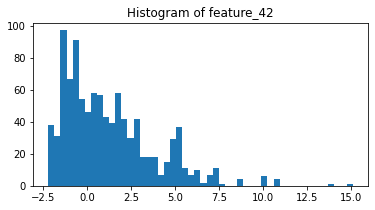

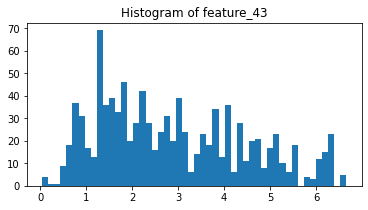

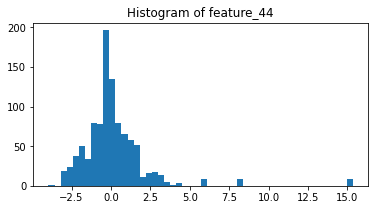

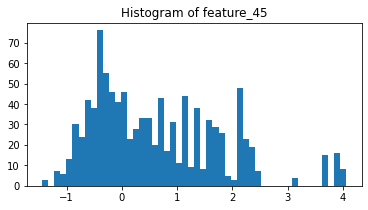

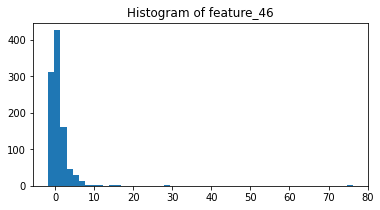

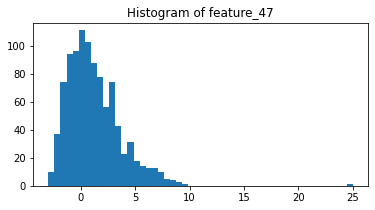

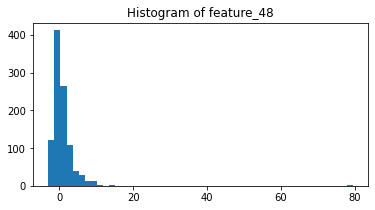

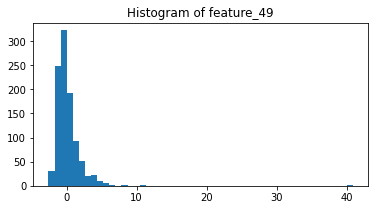

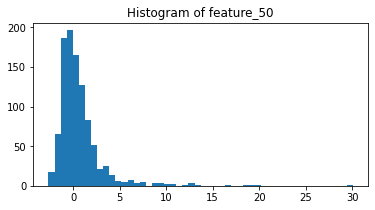

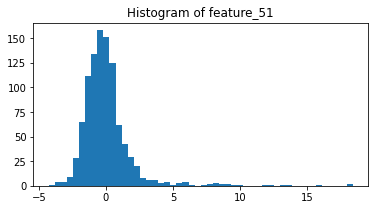

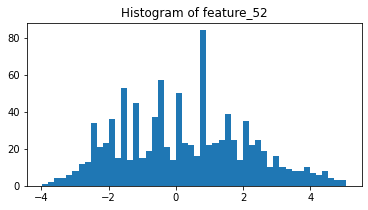

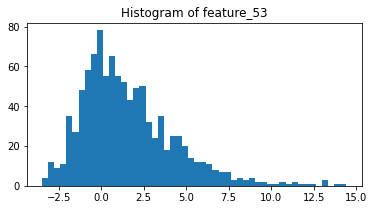

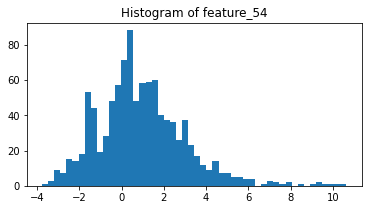

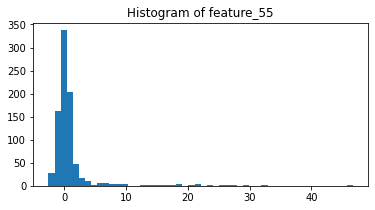

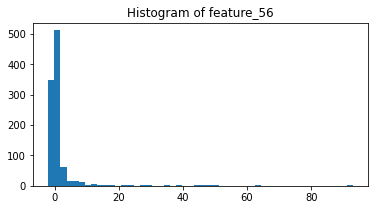

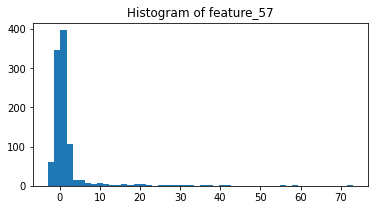

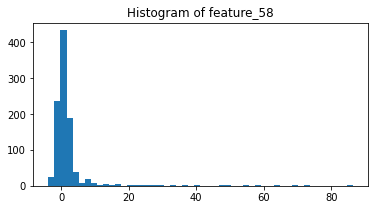

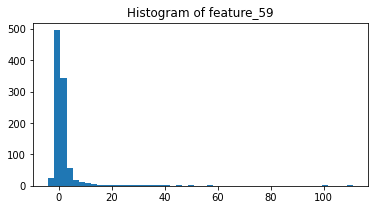

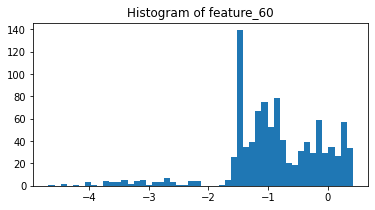

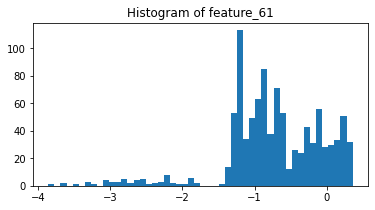

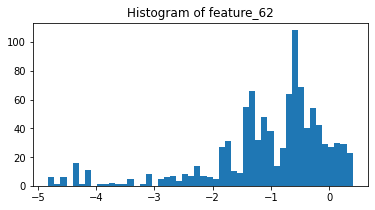

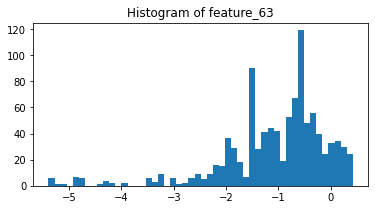

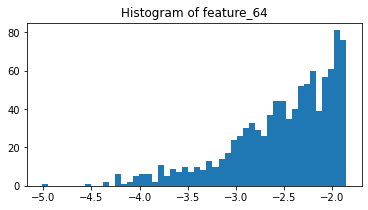

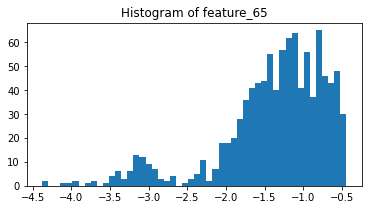

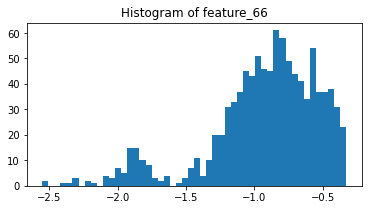

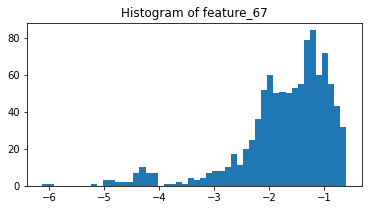

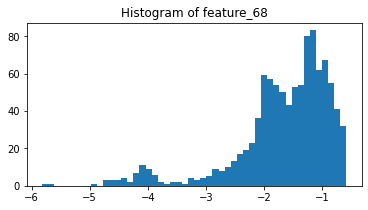

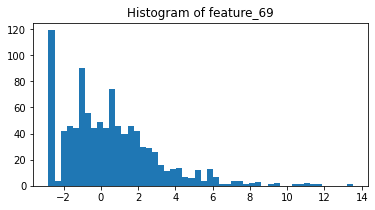

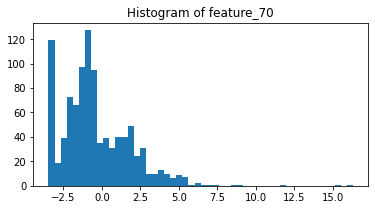

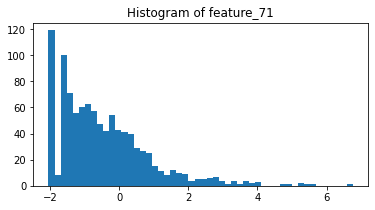

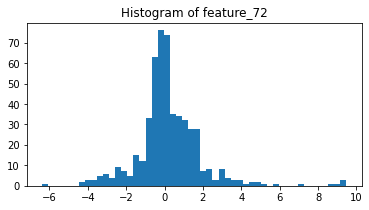

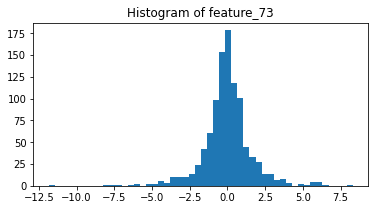

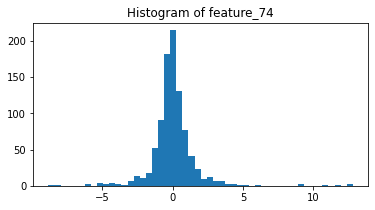

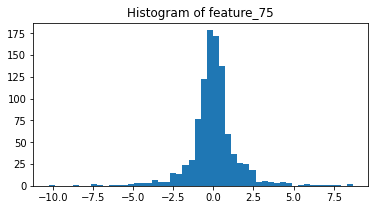

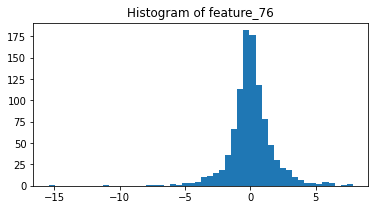

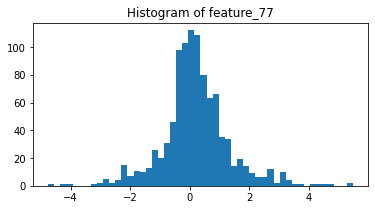

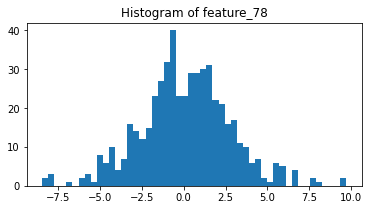

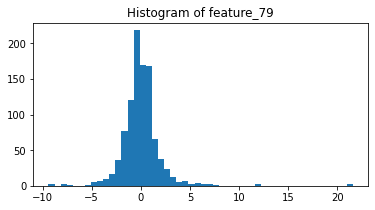

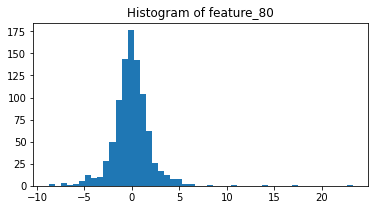

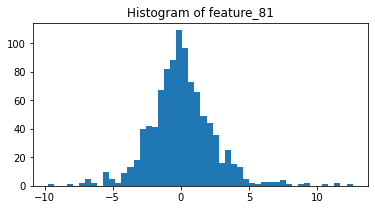

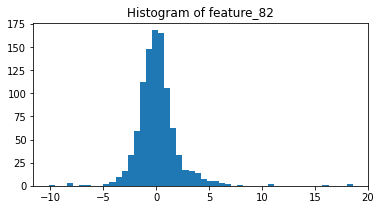

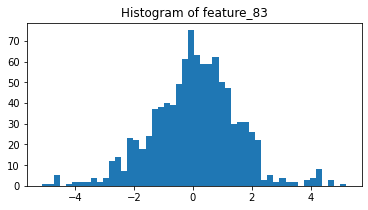

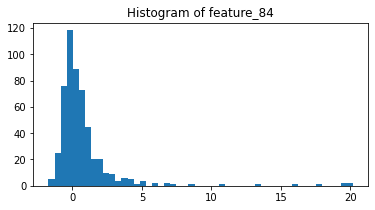

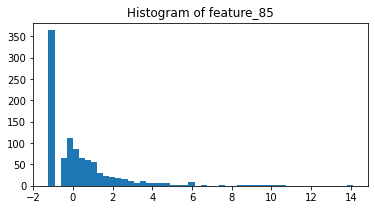

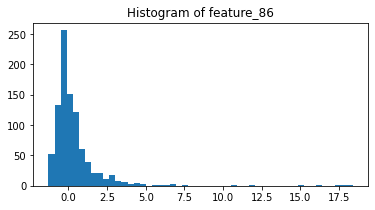

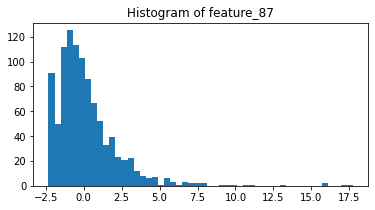

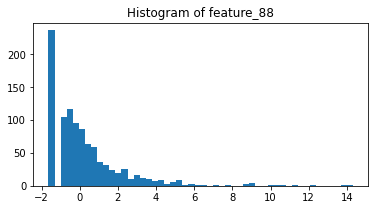

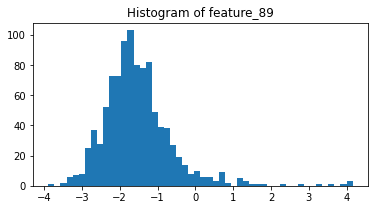

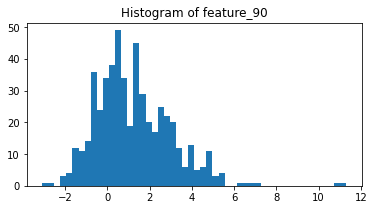

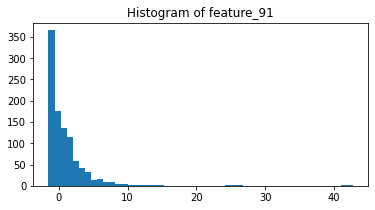

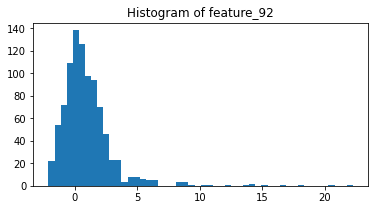

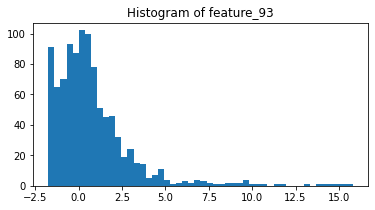

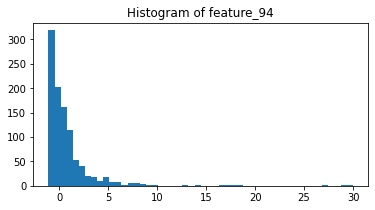

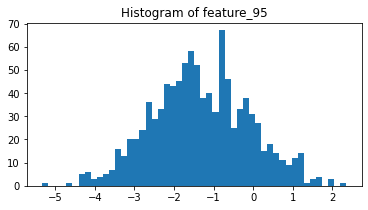

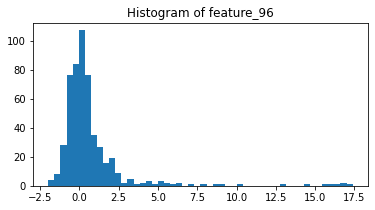

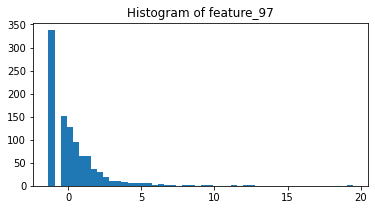

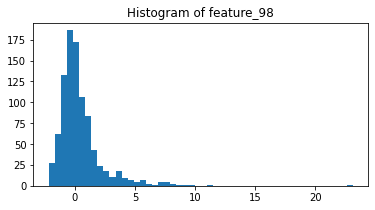

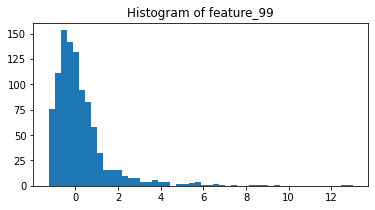

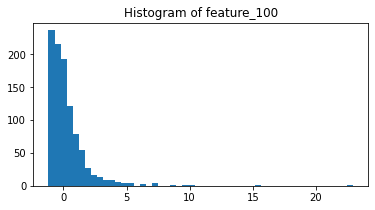

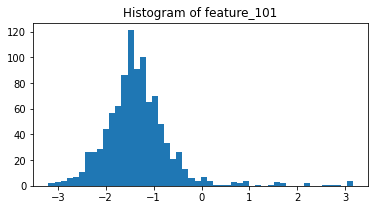

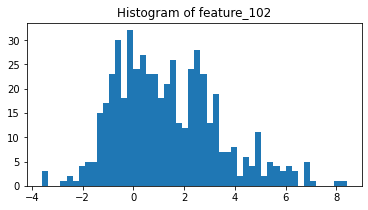

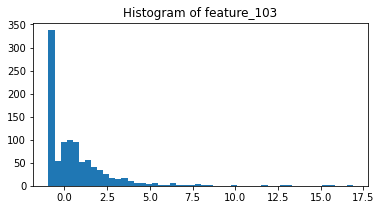

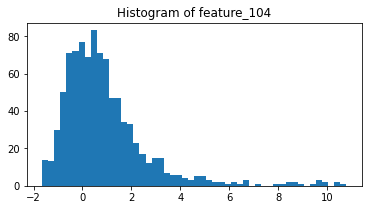

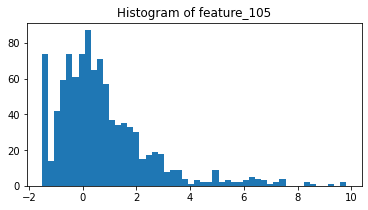

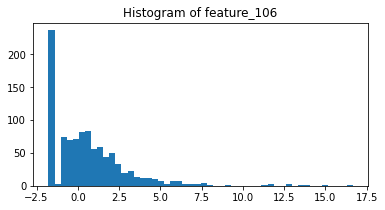

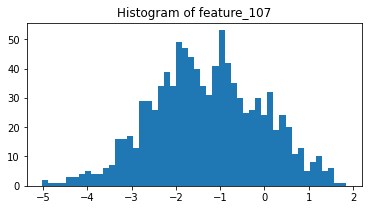

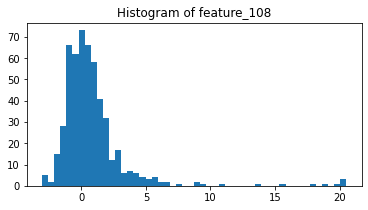

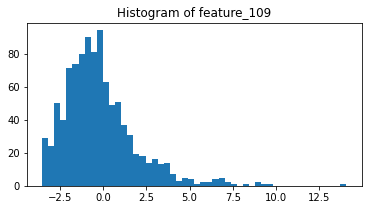

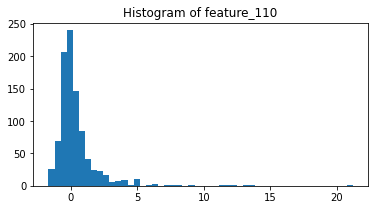

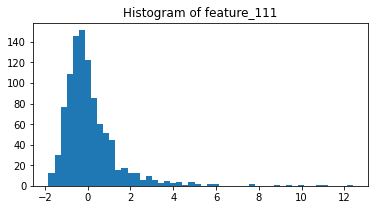

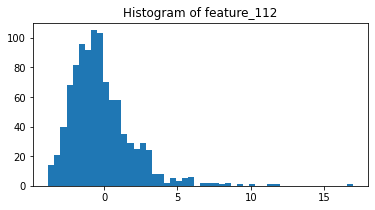

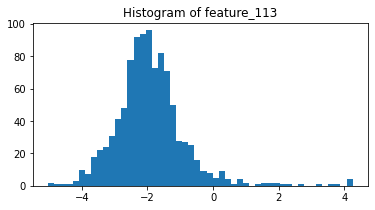

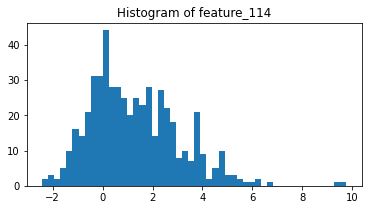

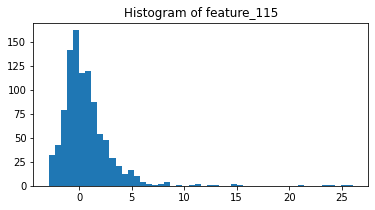

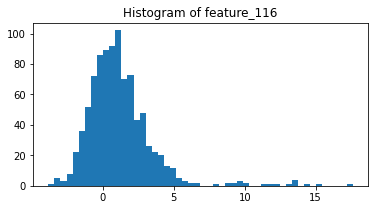

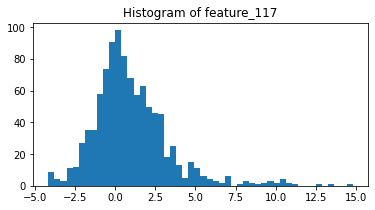

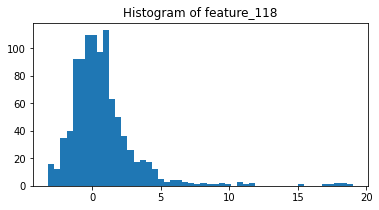

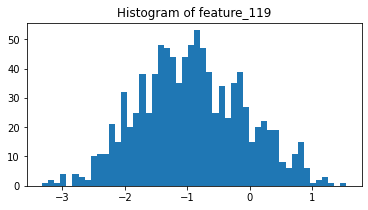

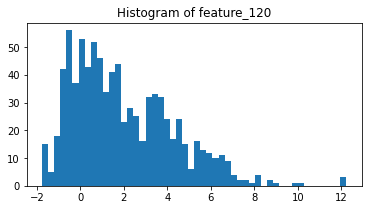

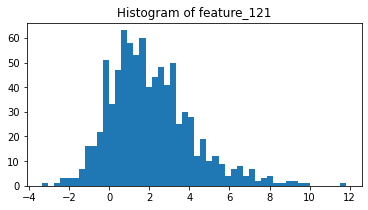

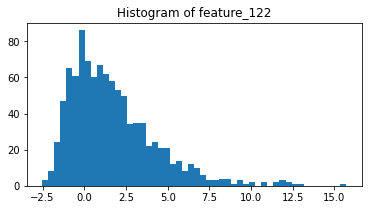

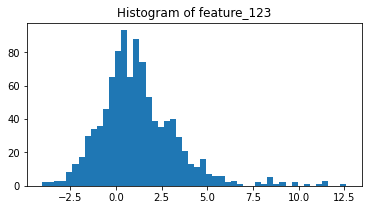

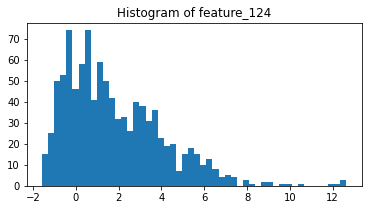

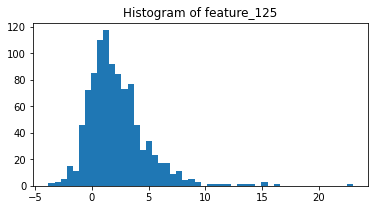

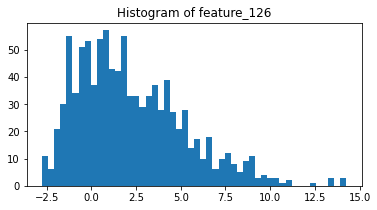

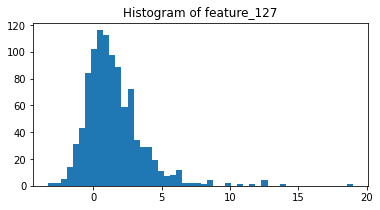

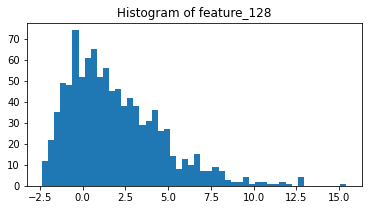

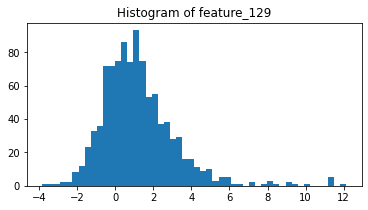

In [18]:
n_bins = 50 # can decrease to get a wider bin (or vice versa)

for column_name in feature_col:
    ax=plt.subplots(figsize=(6,3))
    # get data by column_name and display a histogram
    ax = plt.hist(train_data[column_name], bins=n_bins)
    title="Histogram of " + column_name
    plt.title(title, fontsize=12)
    plt.show()


In [19]:
train_data_np = features.to_numpy()

In [20]:
train_data_np.shape

(1000, 130)

In [21]:
pca = PCA(n_components=130)
pca.fit(train_data_np)

PCA(n_components=130)

In [22]:
params = pca.get_params()

In [48]:
train_data_np.shape

(1000, 130)

In [51]:
x = train_data_np[0].reshape((1,130))
x_trans = pca.transform(x)

In [23]:
def get_min_num(pca,min_exp=0.80):
    """
    Returns number of principle components that are
    necessary to reach a given min explained variance 
    threshold
    """
    explained_var = pca.explained_variance_ratio_.cumsum()
    
    return np.where(explained_var >= min_exp)[0][0] - 1

In [24]:
pca.explained_variance_ratio_.cumsum() >= .90

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [25]:
min_idx = get_min_num(pca,min_exp=0.9)

In [26]:
v = pca.components_

In [27]:
import seaborn as sns

In [28]:
v[:min_idx].shape

(18, 130)

In [29]:
def display_component(v, features_list, min_idx, n_weights=10):
    
    # get the list of weights from a row in v, dataframe
    v_1 = v[min_idx,:]

    # match weights to features in counties_scaled dataframe, using list comporehension
    comps = pd.DataFrame(list(zip(v_1, features_list)), 
                         columns=['weights', 'features'])

    # we'll want to sort by the largest n_weights
    # weights can be neg/pos and we'll sort by magnitude
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(n_weights)

    # display using seaborn
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("PCA Component Makeup, Component #" + str(min_idx))
    plt.show()

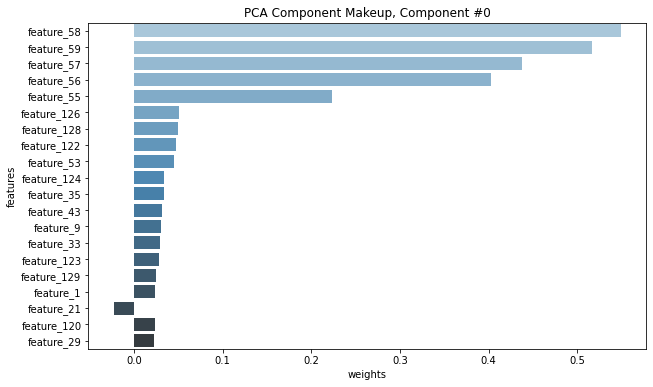

In [30]:
display_component(v,feature_col,0,n_weights=20)

In [31]:
# create dimensionality-reduced data
def create_transformed(pca, features, n_top_components):
    ''' Return a dataframe of data points with component features. 
        The dataframe should be indexed by State-County and contain component values.
        :param train_pca: A list of pca training data, returned by a PCA model.
        :param features: A dataframe of features.
        :param n_top_components: An integer, the number of top components to use.
        :return: A dataframe with n_top_component values as columns.        
     '''
    # create new dataframe to add data to
    transformed= pca.transform(features)

    # keep only the top n components    
    transformed = transformed[:,:n_top_components]
    
    return transformed



In [32]:
projected = create_transformed(pca,features.to_numpy(),n_top_components=10)

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(projected)

In [35]:
def histogram_labels(k_model):
    
    K = len(set(k_model.labels_))
    ax =plt.subplots(figsize=(6,3))
    ax = plt.hist(k_model.labels_, bins=K, color='blue', rwidth=0.5)
    title="Histogram of Cluster Counts"
    plt.title(title, fontsize=12)
    plt.show()

In [55]:
kmeans.predict(x_trans[:,:10])[0]

5

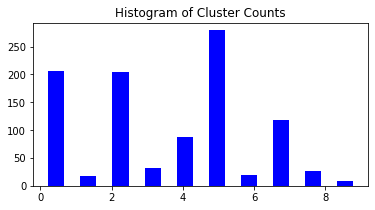

In [36]:
histogram_labels(kmeans)

In [37]:
K = len(set(kmeans.labels_))

In [38]:
def label_count(labels,item):
    
    if item not in labels:
        return 0
    
    return len(np.where(kmeans.labels_ == item)[0])

In [39]:
count_dict = {item:label_count(kmeans.labels_,item) for item in range(K)}

In [40]:
count_dict

{0: 206, 1: 17, 2: 205, 3: 32, 4: 87, 5: 279, 6: 20, 7: 119, 8: 27, 9: 8}

In [41]:
centroids = kmeans.cluster_centers_

In [42]:
centroids_df = pd.DataFrame(centroids,columns=[f"c_{i}" for i in range(K)])

In [43]:
centroids_df.head()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9
0,-1.902514,2.721590,-5.855250,-3.283975,0.406451,0.007421,-0.426723,-0.310931,1.085078,0.259556
1,81.824134,-6.798677,0.222471,-1.576573,-0.648181,1.776145,-0.702203,-0.416878,0.254778,-0.566992
2,-3.034940,-4.521103,6.146477,-2.158729,-0.930337,-0.259854,0.662400,1.223519,-0.268769,0.017288
3,3.388420,-3.739929,3.242047,11.781556,2.610930,-7.195473,6.493881,7.306989,0.953419,5.238772
4,-2.022904,-0.955301,19.411506,5.652095,-1.098089,0.818287,-2.100748,-1.294375,0.923959,-1.566747


In [44]:
def centroid_heatmap(centroids):
    plt.figure(figsize = (12,9))
    ax = sns.heatmap(centroids, cmap = 'YlGnBu')
    ax.set_ylabel("Cluster")
    plt.yticks(fontsize = 16)
    plt.xticks(fontsize = 16)
    ax.set_title("Attribute Value by Centroid")
    plt.show()

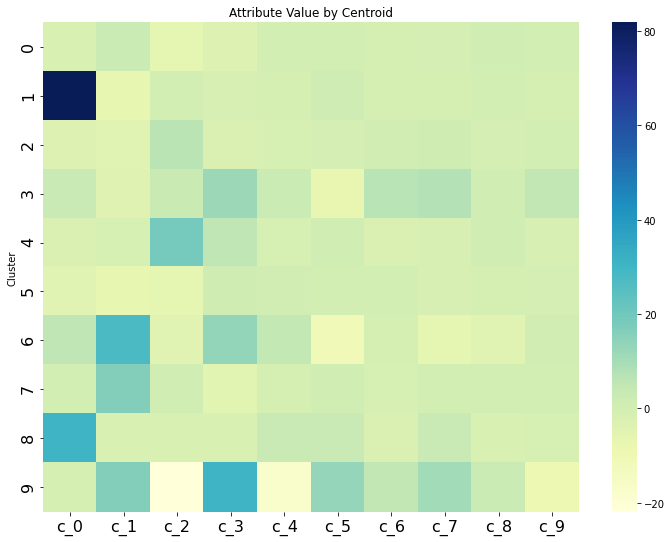

In [45]:
centroid_heatmap(centroids_df)